### Modeling(Ridge, Random Forest Optuna)

In [ ]:
scaler = StandardScaler()
# 학습 데이터 각 변수의 평균값과 표준편차를 저장한 후, 이를 사용하여 학습 및 평가용 데이터를 변환
x_train_[col_numerical] = scaler.fit_transform(x_train_[col_numerical])
x_valid[col_numerical] = scaler.transform(x_valid[col_numerical])

In [ ]:
x_train

,04_gas_para15,04_hv_para47,04_temp_para32,04_time_para16,04_time_para29,04_time_para30,04_time_para34,04_time_para37,04_time_para42,04_time_para43,...,cut_20_gas_para19_f,cut_20_gas_para19_g,cut_20_hv_para3_a,cut_20_hv_para3_b,cut_20_hv_para3_c,cut_20_hv_para3_d,cut_17_fr_para35_A,cut_17_fr_para35_B,cut_20_fr_para35_A,cut_20_fr_para35_B
0,1599.912801,150.00000,19.972727,1952.9166,607.85000,17.266666,1189.68330,607.85000,1952.9166,1952.9166,...,0,0,0,1,0,0,0,1,0,1
1,1600.000000,149.96774,19.994118,3685.3667,870.78330,870.783300,949.43335,870.78330,3685.3667,3685.3667,...,0,0,0,1,0,0,1,0,1,0
2,1600.000000,150.00000,19.969696,2574.4333,837.63336,2574.433300,2574.43330,246.35000,2574.4333,2574.4333,...,0,0,0,1,0,0,1,0,1,0
3,1600.000000,149.75000,19.975000,2834.9500,27.41667,27.416670,27.68333,27.41667,2834.9500,2834.9500,...,0,0,0,0,1,0,1,0,1,0
4,1599.920001,150.00000,19.972730,1933.3000,588.25000,1933.300000,1170.08300,588.25000,1933.3000,1933.3000,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1600.000000,150.00000,19.987879,1909.3000,223.28334,140.233340,1909.30000,223.28334,1909.3000,1909.3000,...,0,0,0,1,0,0,1,0,1,0
1439,1600.000000,150.00000,19.990910,1875.1330,189.11670,106.083300,1875.13300,189.11670,1875.1330,1875.1330,...,0,0,0,1,0,0,1,0,1,0
1440,1600.000000,150.00000,19.990910,1875.1330,189.11670,106.083300,1875.13300,189.11670,1875.1330,1875.1330,...,0,0,0,1,0,0,1,0,1,0
1441,1600.000000,150.00000,19.990910,1875.1330,189.11670,106.083300,1875.13300,189.11670,1875.1330,1875.1330,...,0,0,0,1,0,0,1,0,1,0


모델의 성능 평가를 위해 제곱근평균제곱오차(RMSE)를 반환하는 함수를 작성 

In [ ]:
# mean_squared_error 의 매개변수 squared 가 False 이면 RMSE 를 반환
def rmse(y_true,y_pred):

    return round(mean_squared_error(y_true, y_pred,squared=False),4)

<a name='05-02'></a>
### 5.2 릿지 회귀 모델
선형 모델 중 하나인 릿지 모델을 사용, 릿지 모델은 계수의 제곱에 비례하여 벌칙을 부여하는 **L2 정규화**를 사용

릿지 회귀 모델에서 튜닝해야할 매개변수는 정규화의 세기를 나타내는 **alpha**


하이퍼파라미터 종류: ['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'random_state', 'solver', 'tol']

1. alpha: 규제의 강도
2. solver: 계산에 사용할 알고리즘
3. tol: 정밀도 (solver가 svd와 cholesky일 경우에는 의미 없음.)

In [ ]:
# log 단위(1e+01)로 1.e-02 ~ 1.e+01 구간에 대해 매개변수를 탐색
# solver_list = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
ridge_params = {'alpha': np.logspace(-2, 1, 6)}

매개변수 탐색을 위해 그리드 서치 기법을 사용 

GridSearchCV는 매개변수 각 조합에 대해 모델을 훈련하고, K-폴드 교차검증으로 평가. cv default = 5 

refit=True 로 설정할 경우, 매개변수 탐색 후, 전체 데이터셋에서 최적의 하이퍼파라미터를 사용하여 모델을 재학습

In [ ]:
# GridSearchCV를 이용하여 Ridge 모델을 저장
ridge_model = GridSearchCV(Ridge(), param_grid=ridge_params, scoring='neg_root_mean_squared_error', refit=True) # error가 작아야 좋기 때문에 negative 지표로
ridge_model.fit(x_train_,y_train_)  

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([ 0.01      ,  0.03981072,  0.15848932,  0.63095734,  2.51188643,
       10.        ])},
             scoring='neg_root_mean_squared_error')

In [ ]:
col_cv_results = ['params','mean_test_score','rank_test_score']
pd.DataFrame(ridge_model.cv_results_)[col_cv_results]

,params,mean_test_score,rank_test_score
0,{'alpha': 0.01},-0.007559,6
1,{'alpha': 0.039810717055349734},-0.006725,5
2,{'alpha': 0.15848931924611134},-0.005876,4
3,{'alpha': 0.630957344480193},-0.005241,3
4,{'alpha': 2.5118864315095797},-0.004717,2
5,{'alpha': 10.0},-0.004402,1


alpha 가 10인 경우, 모델의 성능이 가장 우수

<a name="05-03"></a>
### 5.3 랜덤 포레스트 모델 
랜덤 포레스트는 행 데이터를 샘플링한 후, 병렬로 수행된 다수의 결정 트리로부터 예측한 평균값을 출력 

랜덤 포레스트에서 튜닝해야할 변수

*  n_estimators : 결정 트리 갯수 ( default : 100 )
*  max_depth : 트리의 최대 깊이 ( default : None ) 
*  min_samples_split : 노드를 분할하기 위한 최소 샘플 갯수 ( default : 2 )
*  min_samples_leaf : 리프 노드가 되기 위한 최소 샘플 갯수 ( default : 1 )
*  max_features : 각 노드에서 분기시 사용할 최대 특성 갯수 ( default : 1.0 - 전체 특성 갯수 )
*  bootstrap : 중복을 허용한 샘플링 여부 ( default : True ) 


결정 트리의 갯수가 커질수록 계산시간이 증가하므로, 시간과 성능의 트레이드 오프로 결정 

In [ ]:
# GridSearchCV를 이용하여 Randomforest 모델을 저장
rf_params = {'max_features': [5,6], 'n_estimators': [120, 200]}
rf_model = GridSearchCV(RandomForestRegressor(random_state=1), param_grid=rf_params, scoring='neg_root_mean_squared_error', refit=True) 
rf_model.fit(x_train_,y_train_)  

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_features': [5, 6], 'n_estimators': [120, 200]},
             scoring='neg_root_mean_squared_error')

In [ ]:
pd.DataFrame(rf_model.cv_results_)[col_cv_results].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'max_features': 5, 'n_estimators': 200}",-0.003455,1
0,"{'max_features': 5, 'n_estimators': 120}",-0.003460,2
3,"{'max_features': 6, 'n_estimators': 200}",-0.003478,3
2,"{'max_features': 6, 'n_estimators': 120}",-0.003488,4


In [ ]:
# # GridSearchCV를 이용하여 CatBoost 모델 저장
cbr_params = {'depth': [10], 'learning_rate': [0.01]}
            
cbr_model = GridSearchCV(CatBoostRegressor(random_state=1, iterations=100), param_grid=cbr_params, scoring='neg_root_mean_squared_error', cv=2, n_jobs=-1, refit=True) 
cbr_model.fit(x_train,y_train)

cbr_model = CatBoostRegressor(random_state=1, iterations=100)
cbr_model.fit(x_train_,y_train_)

Learning rate set to 0.260153
0:	learn: 0.0121576	total: 83.5ms	remaining: 8.27s
1:	learn: 0.0095259	total: 94.4ms	remaining: 4.62s
2:	learn: 0.0075245	total: 103ms	remaining: 3.33s
3:	learn: 0.0060771	total: 111ms	remaining: 2.67s
4:	learn: 0.0050134	total: 119ms	remaining: 2.26s
5:	learn: 0.0043631	total: 126ms	remaining: 1.97s
6:	learn: 0.0038738	total: 132ms	remaining: 1.76s
7:	learn: 0.0034745	total: 140ms	remaining: 1.61s
8:	learn: 0.0032115	total: 147ms	remaining: 1.48s
9:	learn: 0.0030159	total: 154ms	remaining: 1.38s
10:	learn: 0.0028530	total: 161ms	remaining: 1.3s
11:	learn: 0.0027702	total: 169ms	remaining: 1.24s
12:	learn: 0.0026644	total: 176ms	remaining: 1.18s
13:	learn: 0.0025947	total: 183ms	remaining: 1.12s
14:	learn: 0.0025051	total: 190ms	remaining: 1.07s
15:	learn: 0.0024378	total: 199ms	remaining: 1.05s
16:	learn: 0.0023772	total: 212ms	remaining: 1.03s
17:	learn: 0.0022853	total: 223ms	remaining: 1.01s
18:	learn: 0.0022308	total: 231ms	remaining: 987ms
19:	learn:

In [ ]:
# 최적의 하이퍼파라미터로 학습된 릿지 회귀 모델을 저장 
best_ridge = ridge_model.best_estimator_

# 최적의 하이퍼파라미터로 학습된 랜덤포레스트 모델을 저장 
best_rf = rf_model.best_estimator_

# # 최적의 하이퍼파라미터로 학습된 캣부스트 회귀 모델을 저장 
# best_cbr = cbr_model.best_estimator_

### optuna

In [ ]:
import optuna
from optuna import Trial

def objective(trial: Trial) -> float:
    rf_params = {
            'n_estimators': trial.suggest_int('n_estimators', 1, 1000),
            'max_depth': trial.suggest_int('max_depth', 2, 50),
            'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60)
        }
    model = RandomForestRegressor(**rf_params, random_state=42)
    model.fit(x_train, y_train)

    rf_pred = model.predict(x_valid)
    rmse_score = rmse(y_valid, rf_pred)
    
    return rmse_score

In [ ]:
from optuna.samplers import TPESampler

sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name="rf_parameter_opt",
    direction="minimize",
    sampler=sampler
)
study.optimize(objective, n_trials=50)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2023-02-21 22:25:14,394] A new study created in memory with name: rf_parameter_opt
[I 2023-02-21 22:25:22,709] Trial 0 finished with value: 0.0147 and parameters: {'n_estimators': 375, 'max_depth': 48, 'min_samples_split': 110, 'min_samples_leaf': 36}. Best is trial 0 with value: 0.0147.
[I 2023-02-21 22:25:26,133] Trial 1 finished with value: 0.0162 and parameters: {'n_estimators': 157, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 52}. Best is trial 0 with value: 0.0147.
[I 2023-02-21 22:25:38,688] Trial 2 finished with value: 0.015 and parameters: {'n_estimators': 602, 'max_depth': 36, 'min_samples_split': 4, 'min_samples_leaf': 59}. Best is trial 0 with value: 0.0147.
[I 2023-02-21 22:26:04,066] Trial 3 finished with value: 0.0143 and parameters: {'n_estimators': 833, 'max_depth': 12, 'min_samples_split': 28, 'min_samples_leaf': 12}. Best is trial 3 with value: 0.0143.
[I 2023-02-21 22:26:11,874] Trial 4 finished with value: 0.0143 and parameters: {'n_estimators': 

Best Score: 0.0135
Best trial: {'n_estimators': 10, 'max_depth': 20, 'min_samples_split': 134, 'min_samples_leaf': 28}


In [ ]:
tuned_rf = RandomForestRegressor(n_estimators = 668, max_depth =3, min_samples_split = 62, min_samples_leaf = 14, random_state = 42)
tuned_rf.fit(x_train_, y_train_)

RandomForestRegressor(max_depth=3, min_samples_leaf=14, min_samples_split=62,
                      n_estimators=668, random_state=42)

In [ ]:
rmse(np.expm1(tuned_rf.predict(x_valid)), np.expm1(y_valid))

4.2364

<a name='05-04'></a>
### 5.4 최종 모델 구축 

릿지 모델과 랜덤 포레스트 모델을 평가하고, 이 둘의 조합인 앙상블 모델을 구축


In [ ]:
# 학습용 데이터셋의 타깃 변수 예측 
y_pred_tr_ridge = np.expm1(best_ridge.predict(x_train_))
y_pred_tr_rf = np.expm1(best_rf.predict(x_train_))
y_pred_tr_cbr = np.expm1(cbr_model.predict(x_train_))

# 검증용 데이터셋의 타깃 변수 예측 
y_pred_va_ridge = np.expm1(best_ridge.predict(x_valid))
y_pred_va_rf = np.expm1(best_rf.predict(x_valid))
y_pred_va_cbr = np.expm1(cbr_model.predict(x_valid))


# 앙상블 모형의 학습 및 검증 데이터에 대한 타깃 변수 예측 
y_pred_tr_en= np.mean([y_pred_tr_ridge, y_pred_tr_rf, y_pred_tr_cbr], axis=0)
y_pred_va_en= np.mean([y_pred_va_ridge, y_pred_va_rf, y_pred_va_cbr], axis=0)

# 학습 데이터셋의 RMSE 계산 
rmse_tr_ridge = rmse(np.expm1(y_train_), y_pred_tr_ridge)
rmse_tr_rf = rmse(np.expm1(y_train_), y_pred_tr_rf)
rmse_tr_en = rmse(np.expm1(y_train_), y_pred_tr_en)
rmse_tr_cbr = rmse(np.expm1(y_train_), y_pred_tr_cbr)

# 검증 데이터셋의 RMSE 계산 
rmse_va_ridge = rmse(np.expm1(y_valid), y_pred_va_ridge)
rmse_va_rf = rmse(np.expm1(y_valid), y_pred_va_rf)
rmse_va_en = rmse(np.expm1(y_valid), y_pred_va_en)
rmse_va_cbr = rmse(np.expm1(y_valid), y_pred_va_cbr)


print(f'\n**** RIDGE\n')
print(f'Train RMSE: {rmse_tr_ridge}\n')
print(f'Valid RMSE: {rmse_va_ridge}\n')

print(f'\n**** Random Forest\n')
print(f'Train RMSE: {rmse_tr_rf}\n')
print(f'Valid RMSE: {rmse_va_rf}\n')

print(f'\n**** CatBoostRegressor\n')
print(f'Train RMSE: {rmse_tr_cbr}\n')
print(f'Valid RMSE: {rmse_va_cbr}\n')


print(f'\n**** Ensemble\n')
print(f'Train RMSE: {rmse_tr_en}\n')
print(f'Valid RMSE: {rmse_va_en}\n')


**** RIDGE

Train RMSE: 3.6406

Valid RMSE: 5.9594


**** Random Forest

Train RMSE: 1.6231

Valid RMSE: 4.125


**** CatBoostRegressor

Train RMSE: 0.4959

Valid RMSE: 4.5319


**** Ensemble

Train RMSE: 1.7647

Valid RMSE: 4.5088



In [ ]:
scaler = StandardScaler()
x_train[col_numerical] = scaler.fit_transform(x_train[col_numerical])
x_test[col_numerical] = scaler.transform(x_test[col_numerical])

In [ ]:
x_train.shape, x_test.shape

((1443, 418), (123, 418))

In [ ]:
y_test

49     7.146052
237    7.139026
195    7.132866
605    7.136106
197    7.135565
         ...   
69     7.146363
40     7.146292
409    7.140590
173    7.138996
602    7.145495
Name: y, Length: 123, dtype: float64

In [ ]:
y_pred_test_ridge = np.expm1(best_ridge.predict(x_test))
y_pred_test_rf = np.expm1(best_rf.predict(x_test))
y_pred_test_cbr = np.expm1(cbr_model.predict(x_test))

y_pred_test_en= np.mean([y_pred_test_rf, y_pred_test_cbr], axis=0)

rmse_test_en = rmse(np.expm1(y_test), y_pred_test_en)
rmse_test_cbr = rmse(np.expm1(y_test), y_pred_test_cbr)
rmse_test_rf = rmse(np.expm1(y_test), y_pred_test_rf)

print(f'Ensemble: Test RMSE: {rmse_test_en}')
# print(f'CBR: Test RMSE: {rmse_test_cbr}')
# print(f'RF: Test RMSE: {rmse_test_rf}')

Ensemble: Test RMSE: 7.3611


In [ ]:
cbr_model.predict(x_test)

array([7.14529441, 7.14128056, 7.1419892 , 7.13823318, 7.14074445,
       7.13917029, 7.14774478, 7.1414668 , 7.14446498, 7.14263999,
       7.14594385, 7.14402189, 7.14597094, 7.14025394, 7.13936112,
       7.14702267, 7.14261192, 7.15703165, 7.14839832, 7.14382808,
       7.14803101, 7.13848667, 7.14364003, 7.14554922, 7.1457197 ,
       7.13909117, 7.14328346, 7.13713283, 7.14657788, 7.14145722,
       7.14617391, 7.14069731, 7.14670713, 7.13946503, 7.1381102 ,
       7.14550286, 7.13791012, 7.14490193, 7.14812682, 7.1452115 ,
       7.14664113, 7.14040941, 7.14429992, 7.14618461, 7.13851955,
       7.14059426, 7.1367814 , 7.14325489, 7.13865537, 7.14372251,
       7.14238093, 7.14528556, 7.15049919, 7.14058592, 7.1453714 ,
       7.14022984, 7.14109724, 7.14329252, 7.14151613, 7.14393832,
       7.14288274, 7.14346798, 7.1446602 , 7.141868  , 7.14805884,
       7.14212585, 7.14118622, 7.14592263, 7.14089518, 7.15146673,
       7.14206463, 7.14571614, 7.14416625, 7.14964438, 7.14440

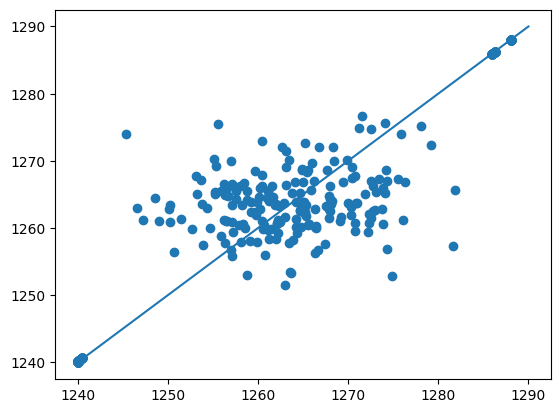

In [ ]:
plt.scatter(np.expm1(y_valid), y_pred_va_en)
x = np.linspace(1240,1290)
y = np.linspace(1240,1290)
plt.plot(x,y)

검증용 데이터로 세가지 모델에 대한 성능을 비교

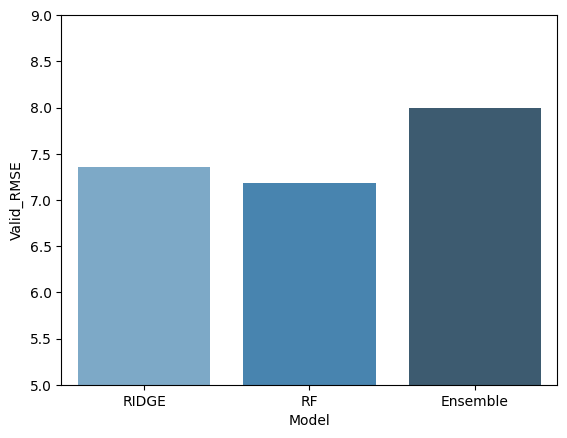

In [ ]:
recap_model = ['RIDGE','RF','Ensemble']
rmse_valid = [rmse_test_en,rmse_test_rf,rmse_test_cbr]
df_recap = pd.DataFrame({'Model':recap_model, 'Valid_RMSE':rmse_valid})
ax = sns.barplot(x='Model',y='Valid_RMSE',data=df_recap,palette='Blues_d')
ax.set_ylim([5,9])
plt.show()

랜덤 포레스트와 같은 트리 기반 모델에서는 각 변수의 중요도 정보를 함께 제공 

특정 변수로 분기되었을 시 제곱오차(squared_error)가 크게 감소한 변수일수록 중요도가 높아짐

분류 문제일 경우에는, 불순도(Gini, entropy)가 크게 감소할수록 해당 특성의 중요도가 높아짐

전체 변수의 중요도 합은 1이며, 이는 상대적 의미를 가짐  



In [ ]:
print('*** MODEL R2_SCORE')
print('ridge: ',r2_score(np.expm1(y_test), y_pred_test_ridge))
print('rf :',r2_score(np.expm1(y_test), y_pred_test_rf))
print('CBR :',r2_score(np.expm1(y_test), y_pred_test_cbr))
print('Ensemble :',r2_score(np.expm1(y_test), y_pred_test_en))

*** MODEL R2_SCORE
ridge:  -0.6543652288013657
rf : 0.14811339828361758
CBR : -0.05637310321142053
Ensemble : 0.10412467888800869
